In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
# renaming the columns by removing additional spaces 
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

# renaming the column appropriately 
df.rename(columns = {'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

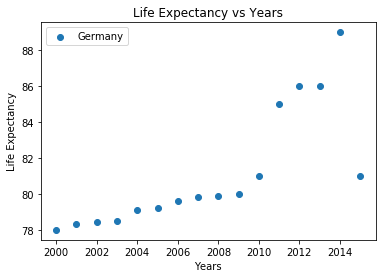

Train:Test split is:  4 : 12


In [4]:
df.fillna(df.mean(), inplace=True)

# change here 
country = 'Germany'

# extract dataframe for selected country
%store -r countryDataFrame

# Feature 1
countryQuantity = columnExtractor(countryDataFrame,'life_expectancy')

# Feature 2
years = columnExtractor(countryDataFrame,'year')

# Visualization 
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

np.random.seed(5)
split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  14


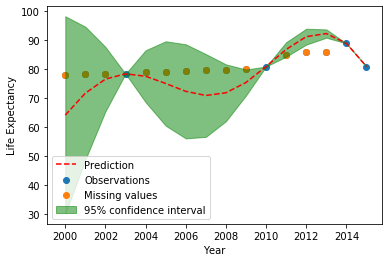

In [5]:
# Gaussian Regression 
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

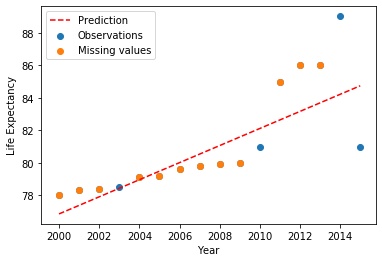

In [6]:
# Linear Regression 
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

In [7]:
# error computation for GPR 
qty = 'life_expectancy'
groundTruth = columnExtractor(countryDataFrame,qty).tolist()[::-1]
print('groundTruth values \n',groundTruth)

countryQuantityPredict = [round(float(i),1) for i in list(countryQuantityPredict)]
errorGPR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredict))
print('GPR prediction \n',countryQuantityPredict)

print('------------------------------------------')


# error computation for LR 
countryQuantityPredictLR = [round(float(i),1) for i in list(countryQuantityPredictLR)]
print('LR prediction \n',list(countryQuantityPredictLR))
errorLR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredictLR))
print('')

print('GPR error: ',errorGPR)
print('LR error: ',errorLR)

#go with rmse for outliers 
#try using normalization

groundTruth values 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR prediction 
 [64.3, 71.8, 76.7, 78.5, 77.7, 75.2, 72.5, 71.0, 72.0, 75.5, 81.0, 86.9, 91.3, 92.4, 89.0, 81.0]
------------------------------------------
LR prediction 
 [76.9, 77.4, 77.9, 78.4, 79.0, 79.5, 80.0, 80.5, 81.1, 81.6, 82.1, 82.6, 83.2, 83.7, 84.2, 84.7]

GPR error:  5.776893628932421
LR error:  1.9978113024007034
